In [1189]:
import pandas as pd
import numpy as np

### **Data Preparation**

In [1190]:
data = "laptops.csv"

In [1191]:
#load dataset
df = pd.read_csv(data)

In [1192]:
#displays first five rows
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [1193]:
#normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [1194]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [1195]:
#subset of dataframe with columns, ram, storage, screen & final_price
df_sub = df[['ram', 'storage', 'screen', 'final_price']]
df_sub.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


### **Exploratory Data Analysis**

In [1196]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

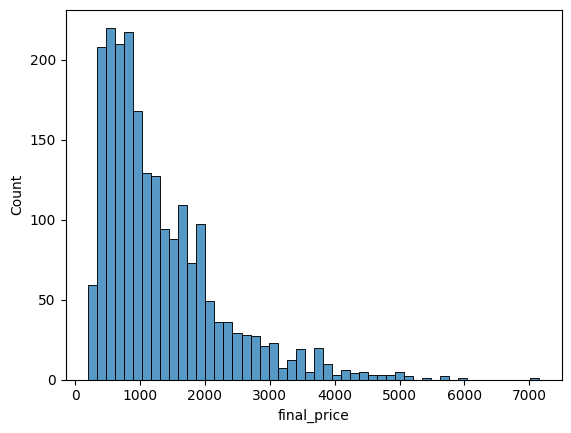

In [1197]:
#number of laptops and their prices
sns.histplot(df_sub.final_price, bins=50)

###### This graph has a "long tail" because a large number of occurrences appear in the tail (in this case, far-right end) of the distribution 

In [1198]:
#To remove the long tail distribution, we use logarithm
price_logs = np.log1p(df_sub.final_price)
price_logs

0       6.917706
1       5.703782
2       6.672033
3       7.090077
4       6.507293
          ...   
2155    7.901374
2156    7.972807
2157    8.131822
2158    7.550130
2159    7.438966
Name: final_price, Length: 2160, dtype: float64

<Axes: xlabel='final_price', ylabel='Count'>

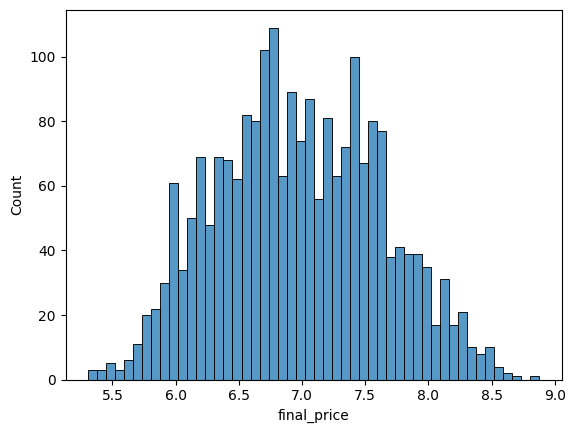

In [1199]:
#number of laptops and their prices - but with the logarithmic prices
sns.histplot(price_logs, bins=50)

###### As you can see, it looks more like a normal distribution

In [1200]:
#number of missing values per column
df_sub.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [1201]:
#median of ram column
df_sub['ram'].median()

np.float64(16.0)

### **Prepare and Split the Dataset**

In [1202]:
#length of dataframe
n = len(df_sub)
n

2160

In [1203]:
#20% of the dataframe for validation
n_val = int(n * 0.2)
n_val

432

In [1204]:
#20% of the dataframe for testing
n_test = int(n * 0.2)
n_test

432

In [1205]:
#60% of the dataframe for training
n_train = n - n_test - n_val
n_train

1296

In [1206]:
#make sure they all add up to the total length of the dataframe
n, n_train + n_test + n_val

(2160, 2160)

###### All records are accounted for

In [1207]:
#dataframe for training
df_train = df_sub.iloc[n_train:]
df_train

,ram,storage,screen,final_price
1296,8,512,15.6,789.84
1297,8,512,14.0,714.29
1298,8,256,15.6,691.97
1299,8,256,15.6,547.19
1300,32,1000,17.3,2052.74
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [1208]:
#dataframe for validation
df_val = df_sub.iloc[n_train:n_train+n_val]
df_val

,ram,storage,screen,final_price
1296,8,512,15.6,789.84
1297,8,512,14.0,714.29
1298,8,256,15.6,691.97
1299,8,256,15.6,547.19
1300,32,1000,17.3,2052.74
...,...,...,...,...
1723,16,512,15.6,1199.00
1724,16,1000,15.6,1599.00
1725,16,1000,17.3,1214.63
1726,16,1000,17.3,966.04


In [1209]:
#dataframe for testing
df_test = df_sub.iloc[n_train+n_val:]
df_test

,ram,storage,screen,final_price
1728,16,1000,15.6,914.64
1729,16,1000,15.6,1098.29
1730,32,1000,15.6,1344.69
1731,32,1000,16.0,1751.09
1732,8,256,13.3,710.00
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


###### The above dataframes were created sequentially, that is, some data in the train dataframe might not be in test dataframe or in the validating dataframe. To fix that we will shuffle the data in the dataset

In [1210]:
#create an array of numbers from the dataset
idx = np.arange(n)
idx

array([   0,    1,    2, ..., 2157, 2158, 2159], shape=(2160,))

In [1211]:
#shuffle the range of numbers (to make results reproducible, we add a seed to the random shuffle)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([2079,  668, 2073, ..., 1130, 1294,  860], shape=(2160,))

In [1212]:
#replace the sequential rows in the new dataframes with the shuffled rows
df_train = df.iloc[idx[:n_train]]

df_val = df.iloc[idx[n_train:n_train+n_val]]

df_test = df.iloc[idx[n_train+n_val:]]

In [1213]:
#first five rows of training df
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2079,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29
668,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,201.05
2073,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,997.74
1113,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,1016.00
788,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,2739.00


In [1214]:
#first five rows of validation df
df_val.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
132,MSI Raider GE68HX 13VF-045XES Intel Core i9-13...,New,MSI,Raider,Intel Core i9,32,1000,SSD,RTX 4060,16.0,No,2599.00
80,HP Pavilion 15-eg2004ns Intel Core i7-1255U/16...,New,HP,Pavilion,Intel Core i7,16,512,SSD,NaN,15.6,No,999.00
1706,Acer Aspire 3 A315-56-52KD Intel Core i5-1035G...,Refurbished,Acer,Aspire,Intel Core i5,12,512,SSD,NaN,15.6,No,477.28
1769,Apple Macbook Air Apple M2/8 GB/256GB SSD/GPU ...,Refurbished,Apple,MacBook Air,Apple M2,8,256,SSD,NaN,13.6,No,1519.00
541,Asus M515UA-EJ374 AMD Ryzen 5 5500U/8GB/512GB ...,New,Asus,M515UA,AMD Ryzen 5,8,512,SSD,NaN,15.6,No,402.99


In [1215]:
#first five rows of testing df
df_test.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
1925,HP ZBook Fury G8 Intel Core i9-11900H/32GB/1TB...,Refurbished,HP,Zbook,Intel Core i9,32,1000,SSD,NaN,15.6,No,4805.65
612,Microsoft Surface Pro 9 Grafito Intel Evo Core...,New,Microsoft,Surface Pro,Intel Evo Core i7,16,512,SSD,NaN,13.0,Yes,2189.00
443,MSI Katana GF66 12UE-1203XES Intel Core i5-124...,New,MSI,Katana,Intel Core i5,16,512,SSD,RTX 3060,15.6,No,1349.00
1002,LG Gram UltraSlim 15Z90RT-G.AA75B Intel Evo Co...,New,LG,Gram,Intel Evo Core i7,16,512,SSD,NaN,15.0,No,2175.83
1077,Asus Rog Strix G15 G513QY-HQ008 AMD Ryzen 9 59...,Refurbished,Asus,ROG,AMD Ryzen 9,16,1000,SSD,NaN,15.6,No,1248.59


In [1216]:
#reset the index for each dataframe
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [1217]:
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,MSI Modern 15 A11SBU-620XES Intel Core i7-1165...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,15.6,No,1123.29
1,Thomson Neo White Intel Celeron N4020/4GB/64GB...,New,Thomson,Neo,Intel Celeron,4,64,eMMC,NaN,14.1,No,201.05
2,MSI Modern 14 B11SB-420XES Intel Core i7-1165G...,Refurbished,MSI,Modern,Intel Core i7,32,1000,SSD,MX 450,14.0,No,997.74
3,ASUS ZenBook 13 OLED UX325EA Intel Evo Core i7...,New,Asus,ZenBook,Intel Evo Core i7,16,512,SSD,NaN,13.3,No,1016.00
4,Acer Predator Triton 500 SE PT516-51s-75K6 Int...,New,Acer,Predator,Intel Core i7,32,1000,SSD,RTX 3080,16.0,No,2739.00


In [1218]:
df_val.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,MSI Raider GE68HX 13VF-045XES Intel Core i9-13...,New,MSI,Raider,Intel Core i9,32,1000,SSD,RTX 4060,16.0,No,2599.00
1,HP Pavilion 15-eg2004ns Intel Core i7-1255U/16...,New,HP,Pavilion,Intel Core i7,16,512,SSD,NaN,15.6,No,999.00
2,Acer Aspire 3 A315-56-52KD Intel Core i5-1035G...,Refurbished,Acer,Aspire,Intel Core i5,12,512,SSD,NaN,15.6,No,477.28
3,Apple Macbook Air Apple M2/8 GB/256GB SSD/GPU ...,Refurbished,Apple,MacBook Air,Apple M2,8,256,SSD,NaN,13.6,No,1519.00
4,Asus M515UA-EJ374 AMD Ryzen 5 5500U/8GB/512GB ...,New,Asus,M515UA,AMD Ryzen 5,8,512,SSD,NaN,15.6,No,402.99


In [1219]:
df_test.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,HP ZBook Fury G8 Intel Core i9-11900H/32GB/1TB...,Refurbished,HP,Zbook,Intel Core i9,32,1000,SSD,NaN,15.6,No,4805.65
1,Microsoft Surface Pro 9 Grafito Intel Evo Core...,New,Microsoft,Surface Pro,Intel Evo Core i7,16,512,SSD,NaN,13.0,Yes,2189.00
2,MSI Katana GF66 12UE-1203XES Intel Core i5-124...,New,MSI,Katana,Intel Core i5,16,512,SSD,RTX 3060,15.6,No,1349.00
3,LG Gram UltraSlim 15Z90RT-G.AA75B Intel Evo Co...,New,LG,Gram,Intel Evo Core i7,16,512,SSD,NaN,15.0,No,2175.83
4,Asus Rog Strix G15 G513QY-HQ008 AMD Ryzen 9 59...,Refurbished,Asus,ROG,AMD Ryzen 9,16,1000,SSD,NaN,15.6,No,1248.59


In [1220]:
#get the target variable for each dataframe (get the numpy array of the car prices)
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [1221]:
#remove the price column (final_price) from our dataframes - so we don't accidentally use it for training
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

#### Dealing with Missing Values

In [1222]:
sub = ['ram', 'storage', 'screen']

##### Method 1

In [1223]:
#fill empty values with zero
def prepare_X_with_zero(df):
    df = df.copy()
    features = sub.copy()
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [1224]:
X_train_zero = prepare_X_with_zero(df_train)
X_train_zero

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]], shape=(1296, 3))

##### Method 2

In [1225]:
#fill empty values with the mean
def prepare_X_with_mean(df):
    df = df.copy()
    features = sub.copy()
    
    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values

    return X

In [1226]:
X_train_mean = prepare_X_with_mean(df_train)
X_train_mean

array([[  32. , 1000. ,   15.6],
       [   4. ,   64. ,   14.1],
       [  32. , 1000. ,   14. ],
       ...,
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   14. ],
       [  16. ,  512. ,   14. ]], shape=(1296, 3))

#### Training Linear Regression Without Regularization

In [1227]:
#train_linear_regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [1228]:
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)

In [1229]:
w0_mean, w_mean = train_linear_regression(X_train_zero, y_train)

#### Validating The Model (including Root Mean Squared Value)

In [1230]:
#rsme function
def rsme(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    rsme = np.sqrt(mse)

    return rsme

In [1231]:
#rsme value for the weights created by filling empty values with zero
X_val = prepare_X_with_zero(df_val)
y_pred = w0_zero + X_val.dot(w_zero)
round(rsme(y_val, y_pred), 2)

np.float64(0.43)

In [1232]:
#rsme value for the weights created by filling empty values with the mean
X_val = prepare_X_with_zero(df_val)
y_pred = w0_mean + X_val.dot(w_mean)
round(rsme(y_val, y_pred), 2)

np.float64(0.43)

###### From the rsme results, you can see that both sets of models are equally okay

#### Training Linear Regression with Regularization

In [1233]:
#regularized linear regression function
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [1234]:
#evaluating model with r = 0
X_train = prepare_X_with_zero(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0)

X_val = prepare_X_with_zero(df_val)
y_pred = w0 + X_val.dot(w)

round(rsme(y_val, y_pred), 2)

np.float64(0.43)

In [1235]:
#evaluating model with r = 0.01
X_train = prepare_X_with_zero(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X_with_zero(df_val)
y_pred = w0 + X_val.dot(w)

round(rsme(y_val, y_pred), 2)

np.float64(0.43)

In [1236]:
#evaluating model with r = 0.1
X_train = prepare_X_with_zero(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.1)

X_val = prepare_X_with_zero(df_val)
y_pred = w0 + X_val.dot(w)

round(rsme(y_val, y_pred), 2)

np.float64(0.43)

In [1237]:
#evaluating model with r = 1
X_train = prepare_X_with_zero(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=1)

X_val = prepare_X_with_zero(df_val)
y_pred = w0 + X_val.dot(w)

round(rsme(y_val, y_pred), 2)

np.float64(0.43)

In [1238]:
#evaluating model with r = 5
X_train = prepare_X_with_zero(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=5)

X_val = prepare_X_with_zero(df_val)
y_pred = w0 + X_val.dot(w)

round(rsme(y_val, y_pred), 2)

np.float64(0.46)

In [1239]:
#evaluating model with r = 10
X_train = prepare_X_with_zero(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=10)

X_val = prepare_X_with_zero(df_val)
y_pred = w0 + X_val.dot(w)

round(rsme(y_val, y_pred), 2)

np.float64(0.51)

In [1240]:
#evaluating model with r = 100
X_train = prepare_X_with_zero(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=100)

X_val = prepare_X_with_zero(df_val)
y_pred = w0 + X_val.dot(w)

round(rsme(y_val, y_pred), 2)

np.float64(0.67)

#### Training Linear Regression - Using Different Seeds for Splitting Data

In [1241]:
#for loop that trains and validates the dataset with different seeds (0 - 9)
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rsme_seed_result = []

for seed in seed_values:
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train_seed = df.iloc[idx[:n_train]]
    df_val_seed = df.iloc[idx[n_train:n_train+n_val]]
    df_test_seed = df.iloc[idx[n_train+n_val:]]

    df_train_seed = df_train_seed.reset_index(drop=True)
    df_val_seed = df_val_seed.reset_index(drop=True)
    df_test_seed = df_test_seed.reset_index(drop=True)

    y_train_seed = np.log1p(df_train_seed.final_price.values)
    y_val_seed = np.log1p(df_val_seed.final_price.values)
    y_test_seed = np.log1p(df_test_seed.final_price.values)

    del df_train_seed['final_price']
    del df_val_seed['final_price']
    del df_test_seed['final_price']

    X_train = prepare_X_with_zero(df_train_seed)
    w0, w = train_linear_regression(X_train, y_train_seed)

    X_val = prepare_X_with_zero(df_val_seed)
    y_pred = w0 + X_val.dot(w)
    
    rsme_seed_result.append(rsme(y_val_seed, y_pred))


In [1242]:
#rsme values for the different seeds
for i, rsme_value in enumerate(rsme_seed_result):
    print(f"Seed {i}: RMSE = {rsme_value}")


Seed 0: RMSE = 0.45368899519729566
Seed 1: RMSE = 0.4266127011048509
Seed 2: RMSE = 0.44856296159535647
Seed 3: RMSE = 0.423713821964277
Seed 4: RMSE = 0.4485754254536299
Seed 5: RMSE = 0.4577521649053751
Seed 6: RMSE = 0.44573311126717113
Seed 7: RMSE = 0.438520277581363
Seed 8: RMSE = 0.45316672579382783
Seed 9: RMSE = 0.4462850845129127


In [1243]:
#standard devation of the rsme values
rsme_seed_result = np.array(rsme_seed_result)
round(rsme_seed_result.std(), 3)

np.float64(0.011)

###### A low standard deviation means the model is stable

##### Combining the Training & Validation dataset to Train the Test dataset (Using Seed = 9)

In [1244]:
#random seed of 9
np.random.seed(9)
np.random.shuffle(idx)

#replace the sequential rows in the new dataframes with the shuffled rows
df_train_seed9 = df.iloc[idx[:n_train]]

df_val_seed9 = df.iloc[idx[n_train:n_train+n_val]]

df_test_seed9 = df.iloc[idx[n_train+n_val:]]

In [1245]:
#assign the target variables
y_train = np.log1p(df_train_seed9.final_price.values)
y_val = np.log1p(df_val_seed9.final_price.values)
y_test = np.log1p(df_test_seed9.final_price.values)

In [1246]:
#remove the final_price column so it is not accidentally trained as well
del df_train_seed9['final_price']
del df_val_seed9['final_price']
del df_test_seed9['final_price']

In [1247]:
#combining the training & validation df
df_full_train = pd.concat([df_train_seed9, df_val_seed9])

In [1248]:
#reset the index of the dataframe
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch
0,HP 15S-FQ5042NS Intel Core i7-1255U/8GB/512GB ...,New,HP,15S,Intel Core i7,8,512,SSD,NaN,15.6,No
1,"Apple MacBook Intel Core M3/8GB/256GB/12"" Oro",Refurbished,Apple,Macbook,Intel Core M3,8,256,NaN,NaN,12.0,No
2,HP 15S-FQ4037NS Intel Core i7-1195G7/16GB/512G...,New,HP,15S,Intel Core i7,16,512,SSD,NaN,15.6,No
3,Lenovo ThinkBook 16p G2 ACH AMD Ryzen 7 5800H/...,New,Lenovo,ThinkBook,AMD Ryzen 7,16,512,SSD,RTX 3060,16.0,No
4,Acer Aspire 3 A315-58-32EE Intel Core i3-1115G...,New,Acer,Aspire,Intel Core i3,8,512,SSD,NaN,15.6,No
...,...,...,...,...,...,...,...,...,...,...,...
1723,Lenovo ThinkBook 14 G4 ABA AMD Ryzen 7 5825U/1...,New,Lenovo,ThinkBook,AMD Ryzen 7,16,512,SSD,NaN,14.0,No
1724,Razer Blade 15 Advanced Model FullHD 360Hz Int...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,15.6,No
1725,Gigabyte AORUS 15P XD Intel Core i7-11800H/16G...,Refurbished,Gigabyte,Aorus,Intel Core i7,16,1000,SSD,RTX 3070,15.6,No
1726,Dell Latitude 9510 Intel Core i5-10210U/8GB/25...,New,Dell,Latitude,Intel Core i5,8,256,SSD,NaN,15.0,No


In [1249]:
#combining training and validation feature matrix
X_full_train = prepare_X_with_zero(df_full_train)
X_full_train

array([[   8. ,  512. ,   15.6],
       [   8. ,  256. ,   12. ],
       [  16. ,  512. ,   15.6],
       ...,
       [  16. , 1000. ,   15.6],
       [   8. ,  256. ,   15. ],
       [   8. ,  240. ,   14. ]], shape=(1728, 3))

In [1250]:
#combining training and validation target variables
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([6.80461452, 6.31821107, 6.54606779, ..., 7.43838353, 7.37775891,
       6.2146081 ], shape=(1728,))

In [1251]:
#regularized linear regression on combined df
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [1252]:
#rsme score of testing df
X_test = prepare_X_with_zero(df_test_seed9)
y_pred = w0 + X_test.dot(w)
rsme_test = rsme(y_test, y_pred)
rsme_test

np.float64(0.4330780939340882)